In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing csv file
sales=pd.read_csv("train.csv")
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
#overview of data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
# shape of data
sales.shape

(9800, 18)

In [13]:
# filling NA with 0
sales['Postal Code'].fillna(0,inplace=True)
# Changing datatype from float to int
sales['Postal Code']=sales['Postal Code'].astype(int)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Data Cleaning

In [15]:
# Checking Duplicates
if sales.duplicated().sum()>0:
    print('Duplicates are present')
else:
    print('No Duplicates')

No Duplicates


In [ ]:
sales.duplicated()

In [17]:
sales.duplicated(keep=False).sum()

0

# Exploratory Data Analysis
## Customer Analysis
### Customer Segmentation

In [18]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
#types_of_customers

types_of_customers=sales['Segment'].unique()
types_of_customers


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [29]:
# number of customers in each segment

no_of_customers=sales.groupby('Segment')['Customer ID'].count()
no_of_customers

no_of_customers=sales['Segment'].value_counts().reset_index()
no_of_customers=no_of_customers.rename(columns={'Segment':'Type_of_customers','count':'Total Customers'})
no_of_customers

,Type_of_customers,Total Customers
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


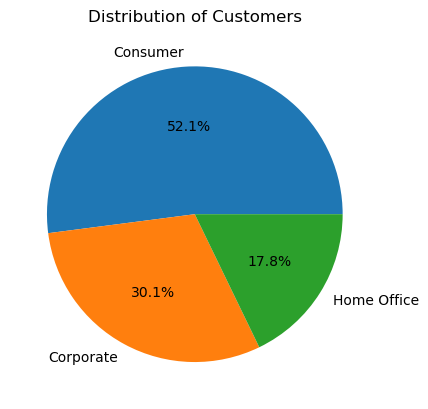

In [33]:
 #plotting pie chart
plt.pie(no_of_customers['Total Customers'],labels=no_of_customers['Type_of_customers'],autopct='%1.1f%%')
plt.title('Distribution of Customers')
plt.show()


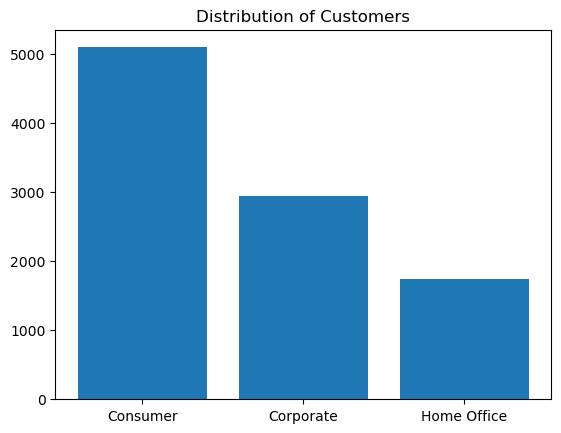

In [73]:
# Bar Graph
plt.bar(no_of_customers['Type_of_customers'],no_of_customers['Total Customers'])
plt.title('Distribution of Customers')
plt.show()

### Customer and Sales

In [38]:
sales_per_category=sales.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category=sales_per_category.rename(columns={'Segment':'Customer_Type','Sales':'Total Sales'})
sales_per_category

,Customer_Type,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


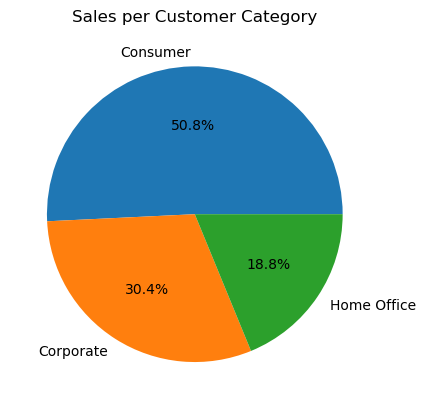

In [40]:
 #plotting pie chart
plt.pie(sales_per_category['Total Sales'],labels=sales_per_category['Customer_Type'],autopct='%1.1f%%')
plt.title('Sales per Customer Category')
plt.show()

### Customer Loyalty

In [54]:
# Grouping data according to : Customer id, Customer Name ,Segment and Calculate freq of their orders
customer_freq_orders=sales.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
#Rename the order id
customer_freq_orders=customer_freq_orders.rename(columns={'Order ID':'Total Orders'})
#Repeat customers
repeat_customers=customer_freq_orders[customer_freq_orders['Total Orders']>=1]
#sorting the repeat customers
sort_repeat_customers = repeat_customers.sort_values(by='Total Orders',ascending=False)
sort_repeat_customers.head(10).reset_index(drop=True)



,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


### Ranking Customers Accorging to Sales

In [59]:
# Grouping data according to : Customer id, Customer Name ,Segment and Calculate their sales
customer_sales=sales.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()
#Rename the sales
customer_sales=customer_freq_orders.rename(columns={'Sales':'Total Sales'})
customer_sales
#sorting the customers according to sales in descing
Top_spenders = customer_sales.sort_values(by='Total Sales',ascending=False)
Top_spenders.head(10).reset_index(drop=True)


,Customer ID,Customer Name,Segment,Total Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


### Analysis of Shipping Methods

In [61]:
types_of_shppingmodes=sales['Ship Mode'].unique()
types_of_shppingmodes

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [76]:
# Frequency use of shipping modes
Shipping_mode=sales['Ship Mode'].value_counts().reset_index()
Shipping_mode=Shipping_mode.rename(columns={'Ship Mode':' Mode Of Shipment','count':'Frequency Use'})
Shipping_mode

,Mode Of Shipment,Frequency Use
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


In [ ]:
 #plotting pie chart
plt.pie(Shipping_mode['Frequency Use'],labels=Shipping_mode['Mode Of Shipment'],autopct='%1.1f%%')
plt.title('Popular Shipping Methods')
plt.show()

### Geographical Analysis

In [82]:
#Customer by State
State=sales['State'].value_counts().reset_index()
State=State.rename(columns={'count':'Number of Customers'})
State.head(10)

,State,Number of Customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [84]:
#Customer by City
City=sales['City'].value_counts().reset_index()
City=City.rename(columns={'count':'Number of Customers'})
City.head(10)

,City,Number of Customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [90]:
# Sales per State
# Grouping state and sales
State_Sales=sales.groupby('State')['Sales'].sum().reset_index()
State_Sales
# sorting starrting from highest state
top_state_sales=State_Sales.sort_values(by='Sales',ascending=False)
top_state_sales.head(10).reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [91]:
# Sales per City
# Grouping city and sales
City_Sales=sales.groupby('City')['Sales'].sum().reset_index()
City_Sales
# sorting starrting from highest state
top_city_sales=City_Sales.sort_values(by='Sales',ascending=False)
top_city_sales.head(10).reset_index(drop=True)

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


### Product Analysis

In [92]:
#Types of product category
sales['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [95]:
# Group data by product category
sub_category=sales.groupby('Category')['Sub-Category'].nunique().reset_index()
sub_category

,Category,Sub-Category
0,Furniture,4
1,Office Supplies,9
2,Technology,4


In [103]:
# Sales per category
sales_category=sales.groupby('Category')['Sales'].sum().round(2).reset_index()
#Rename sales to total sales
sales_category=sales_category.rename(columns={'Sales':'Total Sales'})
#Sorting Total sales in descending order
sort_sales_category=sales_category.sort_values(by='Total Sales',ascending=False)
sort_sales_category


,Category,Total Sales
2,Technology,827455.87
0,Furniture,728658.58
1,Office Supplies,705422.33


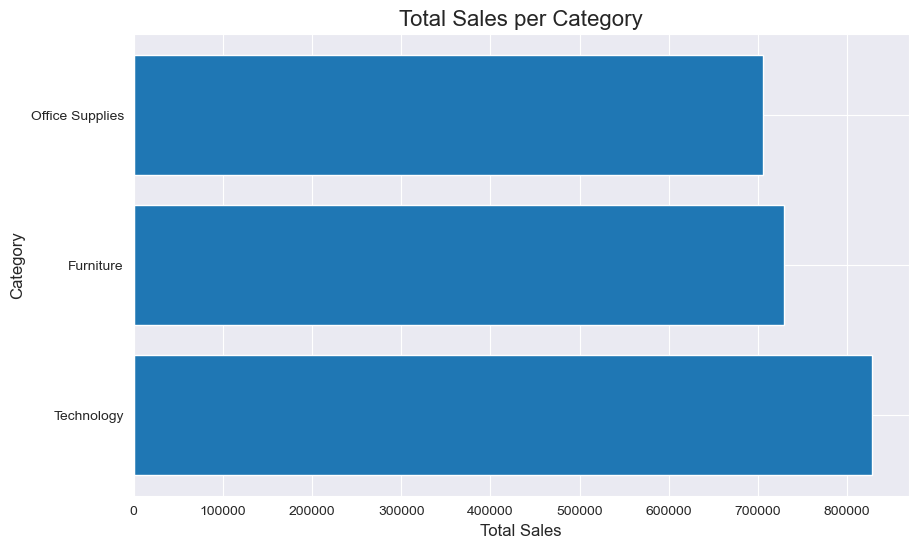

In [119]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

plt.barh(sort_sales_category['Category'],sort_sales_category['Total Sales'])

# Set titles and labels
plt.title('Total Sales per Category', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

In [108]:
# Sales per sub category
sales_sub_category=sales.groupby('Sub-Category')['Sales'].sum().round(2).reset_index()
#Rename sales to total sales
sales_sub_category=sales_sub_category.rename(columns={'Sales':'Total Sales'})
#Sorting Total sales in descending order
sort_sales_sub_category=sales_sub_category.sort_values(by='Total Sales',ascending=False)
sort_sales_sub_category


,Sub-Category,Total Sales
13,Phones,327782.45
5,Chairs,322822.73
14,Storage,219343.39
16,Tables,202810.63
3,Binders,200028.78
11,Machines,189238.63
0,Accessories,164186.70
6,Copiers,146248.09
4,Bookcases,113813.20
1,Appliances,104618.40


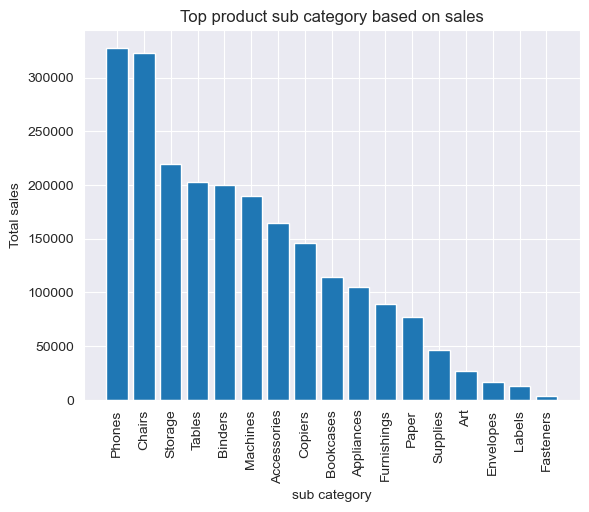

In [117]:
#plotting bar graph
plt.bar(sort_sales_sub_category['Sub-Category'],sort_sales_sub_category['Total Sales'])
plt.title('Top product sub category based on sales')
plt.xlabel('sub category')
plt.ylabel('Total sales')
plt.xticks(rotation=90)
plt.show()

### Sales Trend Analysis

In [124]:
sales['Order Date']=pd.to_datetime(sales['Order Date'],dayfirst=True)

#Grouping by year and summing the sales per year
year_sales=sales.groupby(sales['Order Date'].dt.year)['Sales'].sum().reset_index()
#renaming the columns
year_sales=year_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})
year_sales

,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


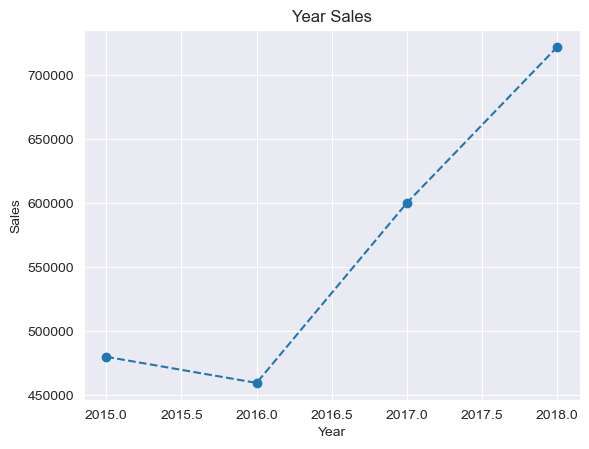

In [129]:
#plotting LIne graph
plt.plot(year_sales['Year'],year_sales['Total Sales'],marker='o',linestyle='--')
plt.title('Year Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### Quarter sales

In [142]:
sales['Order Date']=pd.to_datetime(sales['Order Date'],dayfirst=True)

# filtering data according to year
year_sales=sales[sales['Order Date'].dt.year==2017]

# Caluclate Quarterly sales for yaer 2018
quarterly_sales=year_sales.resample('Q',on='Order Date')['Sales'].sum().reset_index()
quarterly_sales=quarterly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})
print('This are quarterly sales for 2018')
quarterly_sales 



This are quarterly sales for 2018


,Quarter,Total Sales
0,2017-03-31,92686.3650
1,2017-06-30,135061.1610
2,2017-09-30,138056.3742
3,2017-12-31,234388.6498


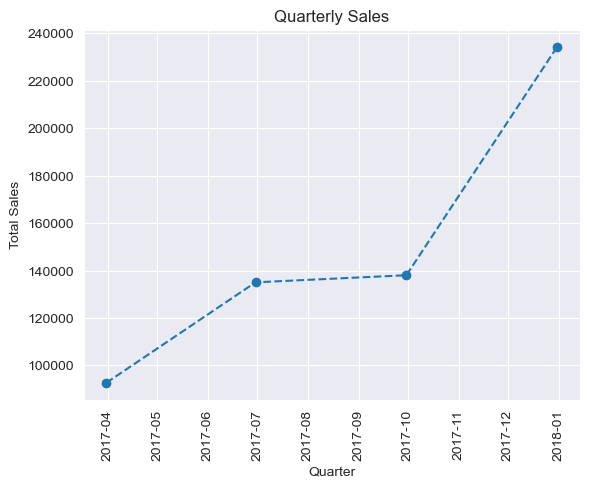

In [143]:
#plotting LIne graph
plt.plot(quarterly_sales['Quarter'],quarterly_sales['Total Sales'],marker='o',linestyle='--')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

### Monthly sales trend for a year

In [144]:
sales['Order Date']=pd.to_datetime(sales['Order Date'],dayfirst=True)

# filtering data according to year
year_sales=sales[sales['Order Date'].dt.year==2017]

# Caluclate Quarterly sales for yaer 2018
Monthly_sales=year_sales.resample('M',on='Order Date')['Sales'].sum().reset_index()
Monthly_sales=Monthly_sales.rename(columns={'Order Date':'Month','Sales':'Total Sales'})
print('This are Monthly sales for 2018')
Monthly_sales


This are quarterly sales for 2018


,Month,Total Sales
0,2017-01-31,18542.4910
1,2017-02-28,22978.8150
2,2017-03-31,51165.0590
3,2017-04-30,38679.7670
4,2017-05-31,56656.9080
5,2017-06-30,39724.4860
6,2017-07-31,38320.7830
7,2017-08-31,30542.2003
8,2017-09-30,69193.3909
9,2017-10-31,59583.0330


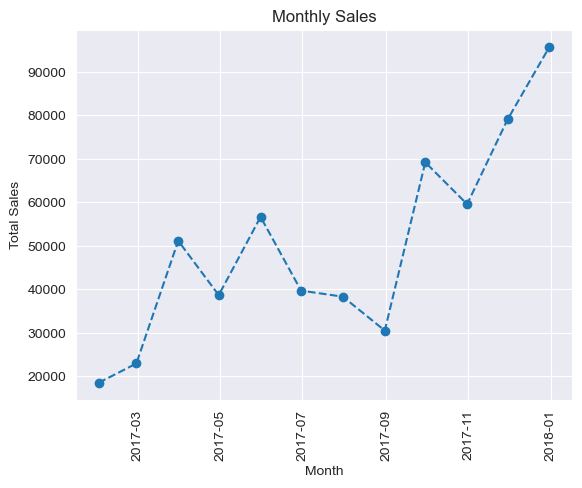

In [145]:
#plotting LIne graph
plt.plot(Monthly_sales['Month'],Monthly_sales['Total Sales'],marker='o',linestyle='--')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()